# Exploring Behavioral Indicators of Drug Abuse by leen shareef

## loading data + heatmap

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("drugAbuser.csv")

In [3]:
df.head()

,Case_ID,Age,Marital_Status,Employment_Status,Income Level,Health Index,Smoking,psychological_disorder,taken_drugs,dropped_motivation_to_working,...,inablity_to_estimate,dryness_or_Redness,Fatigue_pallor,slow_reactions,difficulty_controlling_emotions,Deterioration_of_physical_appearance,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score,Drug_or_not
0,AHU235,20,Single,Unemployed,Low Income,2,Yes,No,No,Yes,...,Yes,Yes,Yes,No,Yes,Yes,29.026112,7,2.113028,Yes
1,AHU249,19,Married,Self-employed,Low Income,3,Yes,No,Yes,Yes,...,No,No,No,Yes,No,Yes,18.493526,9,1.911381,Yes
2,AHU123,27,Single,Part-time employed,Lower Middle Income,1,Yes,Yes,Yes,Yes,...,No,No,No,Yes,Yes,Yes,11.990000,3,2.059167,No
3,AHU107,21,Single,Student,Low Income,3,No,No,No,No,...,Yes,No,No,Yes,No,Yes,10.030000,0,1.903612,No
4,AHU144,18,Single,Student,Low Income,1,Yes,No,No,Yes,...,Yes,Yes,Yes,Yes,Yes,Yes,28.187401,5,2.063855,Yes


In [4]:
columns_to_keep = ['Case_ID', 'Age', 'Marital_Status', 'Employment_Status', 'Income Level', 'Health Index', 'Smoking', 'taken_drugs', 'absence_from_work', 'sleeping_habits', 'headache', 'decreased_social_interaction', 'increased_personal_expenses', 'selling_house_content', 'commit_stole', 'lying', 'car_crash', 'slow_reactions', 'weight_changed', 'distracted_and_absent_minded', 'Weighted_Stress_Index', 'Risk_of_Legal_Issues', 'Risk_Factor_Score', 'Drug_or_not']
df = df[columns_to_keep]
df.head()

,Case_ID,Age,Marital_Status,Employment_Status,Income Level,Health Index,Smoking,taken_drugs,absence_from_work,sleeping_habits,...,commit_stole,lying,car_crash,slow_reactions,weight_changed,distracted_and_absent_minded,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score,Drug_or_not
0,AHU235,20,Single,Unemployed,Low Income,2,Yes,No,Yes,Yes,...,No,Yes,Yes,No,Yes,Yes,29.026112,7,2.113028,Yes
1,AHU249,19,Married,Self-employed,Low Income,3,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,18.493526,9,1.911381,Yes
2,AHU123,27,Single,Part-time employed,Lower Middle Income,1,Yes,Yes,No,Yes,...,No,No,No,Yes,No,No,11.990000,3,2.059167,No
3,AHU107,21,Single,Student,Low Income,3,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,10.030000,0,1.903612,No
4,AHU144,18,Single,Student,Low Income,1,Yes,No,Yes,Yes,...,No,Yes,No,Yes,Yes,Yes,28.187401,5,2.063855,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Case_ID                       227 non-null    object 
 1   Age                           227 non-null    int64  
 2   Marital_Status                227 non-null    object 
 3   Employment_Status             227 non-null    object 
 4   Income Level                  227 non-null    object 
 5   Health Index                  227 non-null    int64  
 6   Smoking                       227 non-null    object 
 7   taken_drugs                   227 non-null    object 
 8   absence_from_work             227 non-null    object 
 9   sleeping_habits               227 non-null    object 
 10  headache                      227 non-null    object 
 11  decreased_social_interaction  227 non-null    object 
 12  increased_personal_expenses   227 non-null    object 
 13  selli

In [6]:
df1 = df.copy()

In [7]:
label_encoder = LabelEncoder()
columns_to_keep = [ 'Marital_Status', 'Employment_Status', 'Income Level', 'Health Index', 'Smoking', 'taken_drugs', 'absence_from_work', 'sleeping_habits', 'headache', 'decreased_social_interaction', 'increased_personal_expenses', 'selling_house_content', 'commit_stole', 'lying', 'car_crash', 'slow_reactions', 'weight_changed', 'distracted_and_absent_minded', 'Drug_or_not']
for column in columns_to_keep:
    df1[column] = label_encoder.fit_transform(df1[column])

df1.head()

,Case_ID,Age,Marital_Status,Employment_Status,Income Level,Health Index,Smoking,taken_drugs,absence_from_work,sleeping_habits,...,commit_stole,lying,car_crash,slow_reactions,weight_changed,distracted_and_absent_minded,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score,Drug_or_not
0,AHU235,20,1,4,0,2,1,0,1,1,...,0,1,1,0,1,1,29.026112,7,2.113028,1
1,AHU249,19,0,2,0,3,1,1,1,1,...,0,1,0,1,1,1,18.493526,9,1.911381,1
2,AHU123,27,1,1,1,1,1,1,0,1,...,0,0,0,1,0,0,11.990000,3,2.059167,0
3,AHU107,21,1,3,0,3,0,0,0,0,...,0,0,1,1,1,1,10.030000,0,1.903612,0
4,AHU144,18,1,3,0,1,1,0,1,1,...,0,1,0,1,1,1,28.187401,5,2.063855,1


In [59]:
correlation_matrix = df1[[ 'Marital_Status', 'Employment_Status', 'Income Level', 'Health Index', 'Smoking', 'taken_drugs', 'absence_from_work', 'sleeping_habits', 'headache', 'decreased_social_interaction', 'increased_personal_expenses', 'selling_house_content', 'commit_stole', 'lying', 'car_crash', 'slow_reactions', 'weight_changed', 'distracted_and_absent_minded', 'Drug_or_not']].corr()
correlation_matrix

,Marital_Status,Employment_Status,Income Level,Health Index,Smoking,taken_drugs,absence_from_work,sleeping_habits,headache,decreased_social_interaction,increased_personal_expenses,selling_house_content,commit_stole,lying,car_crash,slow_reactions,weight_changed,distracted_and_absent_minded,Drug_or_not
Marital_Status,1.000000,0.430737,-0.712616,0.017434,-0.051448,-0.131936,-0.042752,-0.004442,-0.034337,-0.036757,-0.066093,-0.028358,-0.033937,-0.033953,0.040883,0.032759,0.028132,0.017511,-0.049908
Employment_Status,0.430737,1.000000,-0.691490,0.001975,-0.008121,-0.104642,-0.027567,-0.002503,0.068563,-0.042579,-0.033476,-0.042983,0.009804,0.034220,0.132669,-0.027016,-0.020157,-0.016178,-0.001394
Income Level,-0.712616,-0.691490,1.000000,0.056995,-0.082297,0.041553,-0.074686,-0.090885,-0.129039,-0.009160,-0.025714,-0.070518,-0.087042,-0.056277,-0.153816,-0.060885,-0.126255,-0.054568,-0.061793
Health Index,0.017434,0.001975,0.056995,1.000000,-0.673149,-0.228894,-0.543748,-0.645288,-0.486425,-0.562232,-0.538985,-0.406060,-0.290980,-0.566885,-0.208234,-0.750170,-0.554197,-0.656597,-0.681889
Smoking,-0.051448,-0.008121,-0.082297,-0.673149,1.000000,0.164071,0.613025,0.742749,0.425004,0.619265,0.653438,0.349567,0.254694,0.602907,0.213624,0.426383,0.502131,0.505446,0.828160
taken_drugs,-0.131936,-0.104642,0.041553,-0.228894,0.164071,1.000000,0.183133,0.066024,0.141414,0.027483,0.116159,0.206266,0.231039,0.034250,0.076099,0.125026,0.147181,-0.030287,0.092679
absence_from_work,-0.042752,-0.027567,-0.074686,-0.543748,0.613025,0.183133,1.000000,0.571962,0.403701,0.514090,0.559338,0.346407,0.330390,0.614273,0.196031,0.312310,0.472105,0.469695,0.654742
sleeping_habits,-0.004442,-0.002503,-0.090885,-0.645288,0.742749,0.066024,0.571962,1.000000,0.497069,0.723927,0.664138,0.370769,0.265987,0.677270,0.226814,0.421803,0.455876,0.502379,0.692744
headache,-0.034337,0.068563,-0.129039,-0.486425,0.425004,0.141414,0.403701,0.497069,1.000000,0.523336,0.486557,0.378530,0.270811,0.496044,0.246759,0.359749,0.392655,0.390267,0.500753
decreased_social_interaction,-0.036757,-0.042579,-0.009160,-0.562232,0.619265,0.027483,0.514090,0.723927,0.523336,1.000000,0.549290,0.360965,0.220733,0.676544,0.226728,0.357954,0.371232,0.477606,0.623531


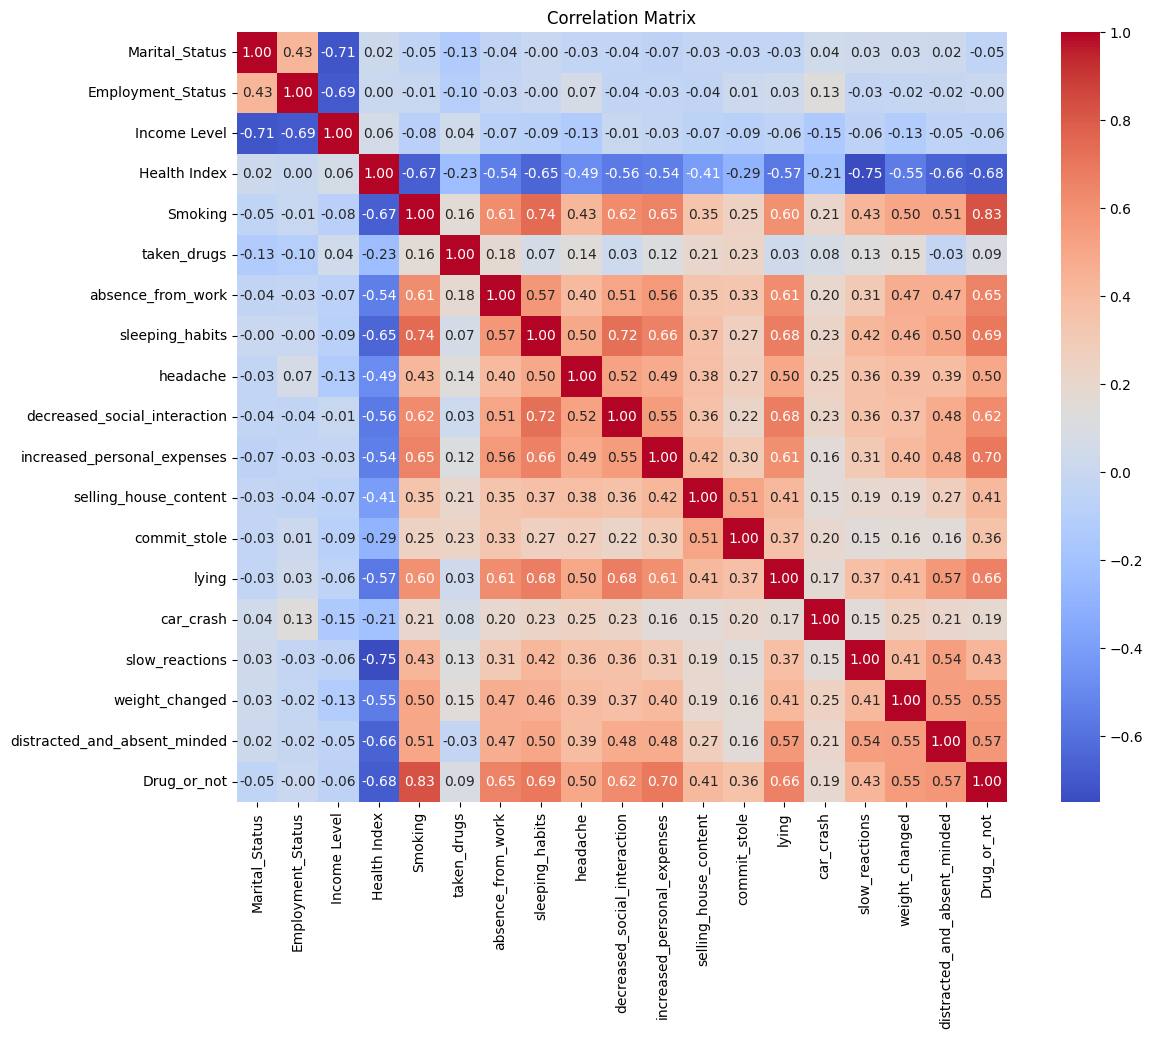

In [52]:
correlation_matrix = df1[[ 'Marital_Status', 'Employment_Status', 'Income Level', 'Health Index', 'Smoking', 'taken_drugs', 'absence_from_work', 'sleeping_habits', 'headache', 'decreased_social_interaction', 'increased_personal_expenses', 'selling_house_content', 'commit_stole', 'lying', 'car_crash', 'slow_reactions', 'weight_changed', 'distracted_and_absent_minded', 'Drug_or_not']].corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix')
plt.show()

# Descriptive analytics 

## measures of frequancy

In [8]:
#frequancy 
freq_of_Employment_status = df['Employment_Status'].value_counts().sort_values()
print(freq_of_Employment_status)

'''
- the category with the highst frequancy in the dataset is students
- There's a variety of employment statuses represented, including self-employed, full-time employed, part-time employed, and unemployed individuals.
- how much students are diagnosed to be having drugs? 
- note: my focus now is for students because they have the higher frequency, and because we can mitigate them before the get deeper in it.
  that does not mean that we will be ignoring the rest, once we explore it diversity, we will be having a well understanding for them all.
- How does age vary across them?
- Is there a connection between employment status and the likelihood of drug abuse?
- Do income levels differ based on employment status?

'''

Employment_Status
Self-employed         29
Full-time employed    34
Part-time employed    36
Unemployed            49
Student               79
Name: count, dtype: int64


"\n- the category with the highst frequancy in the dataset is students\n- There's a variety of employment statuses represented, including self-employed, full-time employed, part-time employed, and unemployed individuals.\n- how much students are diagnosed to be having drugs? \n- note: my focus now is for students because they have the higher frequency, and because we can mitigate them before the get deeper in it.\n  that does not mean that we will be ignoring the rest, once we explore it diversity, we will be having a well understanding for them all.\n- How does age vary across them?\n- Is there a connection between employment status and the likelihood of drug abuse?\n- Do income levels differ based on employment status?\n\n"

In [9]:
# Relative Frequency
freq_of_Marital_Status = df['Marital_Status'].value_counts().sort_values()

total_Marital_Status = df['Marital_Status'].count()
relative_frequency_Marital_Status = (freq_of_Marital_Status / total_Marital_Status) * 100

print(relative_frequency_Marital_Status)

'''
- the data shows that there are more single individuals in the dataset than married ones. This could mean that
single people are more common in the dataset, or there might be reasons why more single people are included compared to married ones.

- marriage status can shape someone's social circle and help network. Single people might have different kinds of support than married
ones, which could affect how they get resources and their chances of certain behaviors or health issues.
'''

Marital_Status
Married    31.718062
Single     68.281938
Name: count, dtype: float64


"\n- the data shows that there are more single individuals in the dataset than married ones. This could mean that\nsingle people are more common in the dataset, or there might be reasons why more single people are included compared to married ones.\n\n- marriage status can shape someone's social circle and help network. Single people might have different kinds of support than married\nones, which could affect how they get resources and their chances of certain behaviors or health issues.\n"

In [10]:
#comulative frequancy
freq_of_income_level = df['Income Level'].value_counts().sort_values()

cumulative_frequency_of_income = freq_of_income_level.cumsum()
print(cumulative_frequency_of_income)

'''
Distribution of Income Levels: The dataset shows a majority of individuals fall 
within the Low Income category, followed by Lower Middle Income, Middle Income, 
and Upper Middle Income categories. This suggests that the dataset is skewed towards 
lower income brackets, with fewer individuals in higher income categories.

'''

Income Level
Upper Middle Income      6
Middle Income           45
Lower Middle Income     85
Low Income             227
Name: count, dtype: int64


'\nDistribution of Income Levels: The dataset shows a majority of individuals fall \nwithin the Low Income category, followed by Lower Middle Income, Middle Income, \nand Upper Middle Income categories. This suggests that the dataset is skewed towards \nlower income brackets, with fewer individuals in higher income categories.\n\n'

In [11]:
#cumulative relative frequency
total_income = df['Income Level'].count()
cumulative_relative_frequency_of_income = cumulative_frequency_of_income / total_income * 100

print(cumulative_relative_frequency_of_income)

Income Level
Upper Middle Income      2.643172
Middle Income           19.823789
Lower Middle Income     37.444934
Low Income             100.000000
Name: count, dtype: float64


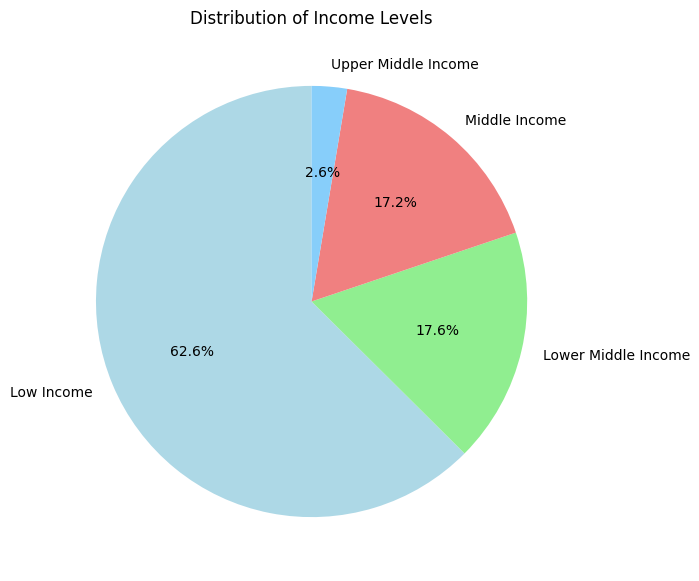

In [12]:
#pie chart
income_counts = df['Income Level'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(income_counts, labels=df['Income Level'].unique(), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Income Levels')
plt.show()

min age: 14
min age: 39


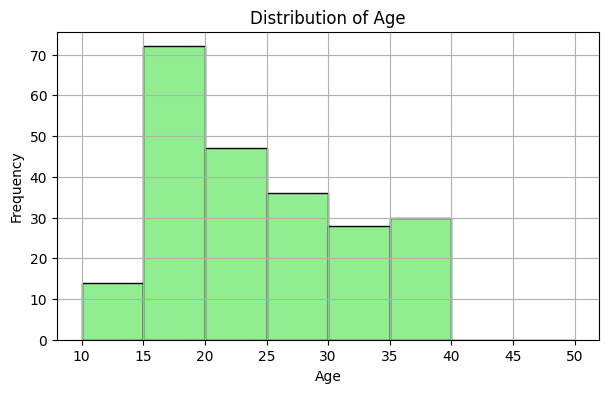

'\n- the range of age between 15 and 20 is the most frequent.\n- the range from 10 till 15 is the least frequant.\n- non-normal distribution, no outliers\n'

In [13]:
#How does age vary across different employment statuses?
min_score_Age = df['Age'].min()
max_score_Age = df['Age'].max()
print('min age:', min_score_Age)
print('min age:', max_score_Age)

plt.figure(figsize=(7, 4)) 
binss = [10, 15, 20, 25, 30, 35, 40, 45, 50]
plt.hist(df['Age'], bins=binss, color='lightgreen', edgecolor='black')  
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

'''
- the range of age between 15 and 20 is the most frequent.
- the range from 10 till 15 is the least frequant.
- non-normal distribution, no outliers
'''

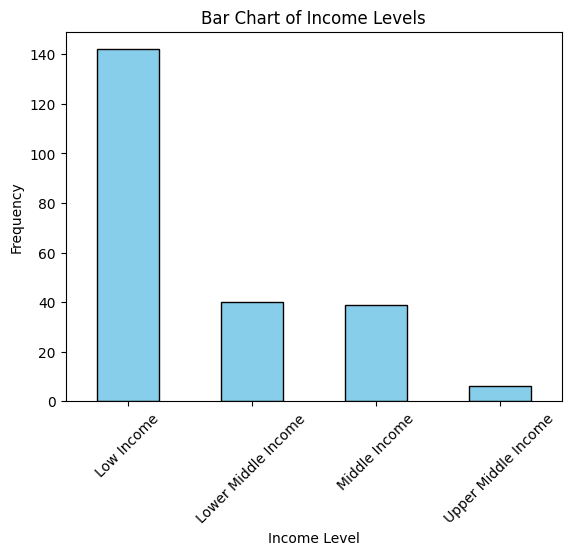

In [14]:
#visualization of the frequancy of the Income level
income_counts = df['Income Level'].value_counts().sort_index()
income_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Bar Chart of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## measures of central tendency 

In [15]:
# mean and median 
mean_of_Risk_Factor_Score = df['Risk_Factor_Score'].mean()
median_of_Risk_Factor_Score = df['Risk_Factor_Score'].median()


print("mean_of_Risk_Factor_Score:",mean_of_Risk_Factor_Score)
print("median_of_Risk_Factor_Score:",median_of_Risk_Factor_Score)

mean_of_Risk_Factor_Score: 1.5038085187224668
median_of_Risk_Factor_Score: 1.896633548


In [16]:
#mode
mode_of_Risk_of_Legal_Issues = df['Risk_of_Legal_Issues'].mode()[0] 

print("mode_of_Risk_of_Legal_Issues:",mode_of_Risk_of_Legal_Issues)

mode_of_Risk_of_Legal_Issues: 0


## Measures of Dispersion

In [17]:
#Range 
min_score_Age = df['Age'].min()
max_score_Age = df['Age'].max()

range_score_Age = max_score_Age - min_score_Age
print("range_score_Age:",range_score_Age)

range_score_Age: 25


In [18]:
#varience
variance_of_Weighted_Stress_Index = df['Weighted_Stress_Index'].var()
print("variance_of_Weighted_Stress_Index:",variance_of_Weighted_Stress_Index)

variance_of_Weighted_Stress_Index: 137.5972854526947


In [19]:
#std
std_of_Weighted_Stress_Index = df['Weighted_Stress_Index'].std()
print("std_of_Weighted_Stress_Index:",std_of_Weighted_Stress_Index)

std_of_Weighted_Stress_Index: 11.730186931702951


In [20]:
#Interquartile range
Q1_Weighted_Stress_Index = df['Weighted_Stress_Index'].quantile(0.25)
Q3_Weighted_Stress_Index = df['Weighted_Stress_Index'].quantile(0.75)
IQR_Weighted_Stress_Index = Q3_Weighted_Stress_Index - Q1_Weighted_Stress_Index

print("IQR_Weighted_Stress_Index:",IQR_Weighted_Stress_Index)


IQR_Weighted_Stress_Index: 23.323436994999998


In [21]:
#Coefficient of Variation
mean_Weighted_Stress_Index = df['Weighted_Stress_Index'].mean()


cv_Weighted_Stress_Index = std_of_Weighted_Stress_Index / mean_Weighted_Stress_Index
print("cv_Weighted_Stress_Indexcv_Weighted_Stress_Index:",cv_Weighted_Stress_Index)

cv_Weighted_Stress_Indexcv_Weighted_Stress_Index: 0.695355275840307


## Measures of Position

In [22]:
# Decile
deciles_age = np.percentile(df['Age'], np.arange(10, 100, 10))
print("deciles_age:\n",deciles_age)

deciles_age:
 [15. 17. 18. 20. 21. 25. 28. 31. 35.]


In [23]:
#Quartile
quartiles_age = np.percentile(df['Age'], [25, 50, 75])
print("quartiles_age:\n",quartiles_age)

quartiles_age:
 [18. 21. 30.]


In [24]:
#percintile 
percentiles_age = np.percentile(df['Age'], [10, 25, 50, 75, 90])
print("percentiles_age:\n",percentiles_age)

percentiles_age:
 [15. 18. 21. 30. 35.]


In [25]:
#z-score
z_scores_age = stats.zscore(df['Age'])
# Find the range of Z-scores for Age 
z_score_range_age = (z_scores_age.min(), z_scores_age.max())
print("z_score_range_age:\n",z_score_range_age)

z_score_range_age:
 (-1.3194618610068456, 2.067216592730761)


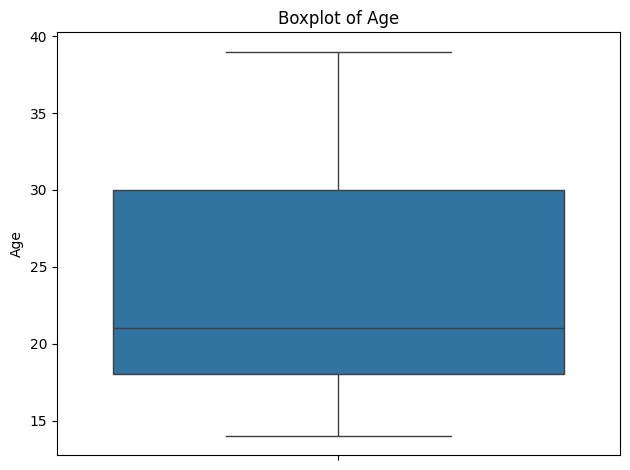

In [26]:
#boxlot
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Age')

plt.tight_layout()
plt.show()

## Outlier detections

In [27]:
df.describe()

,Age,Health Index,Weighted_Stress_Index,Risk_of_Legal_Issues,Risk_Factor_Score
count,227.000000,227.000000,227.000000,227.000000,227.000000
mean,23.740088,2.656388,16.869343,4.334802,1.503809
std,7.398178,1.773949,11.730187,2.998934,0.793593
min,14.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,1.000000,3.800000,1.000000,1.063169
50%,21.000000,3.000000,19.921076,5.000000,1.896634
75%,30.000000,5.000000,27.123437,7.000000,2.032541
max,39.000000,5.000000,33.791716,9.000000,3.373045


In [28]:
#z-score method
z_scores = stats.zscore(df['Age'])
df['Z-scores'] = z_scores
outliers_z_lower = df[(z_scores < -3)]
outliers_z_upper = df[(z_scores > 3)]

print(len(outliers_z_lower))
print(len(outliers_z_upper))

0
0


In [29]:
Q1 = df['Risk_Factor_Score'].quantile(0.25)
Q3 = df['Risk_Factor_Score'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr_lower = df[(df['Risk_Factor_Score'] < lower_bound)]
outliers_iqr_upper = df[(df['Risk_Factor_Score'] > upper_bound)]

print(len(outliers_iqr_lower))
print(len(outliers_iqr_upper))

0
0


## contingency tablee

In [30]:
contingency_table = pd.crosstab(df['Drug_or_not'], df['Employment_Status'], margins=True)
contingency_table

Employment_Status,Full-time employed,Part-time employed,Self-employed,Student,Unemployed,All
Drug_or_not,,,,,,
No,10,10,12,30,12,74
Yes,24,26,17,49,37,153
All,34,36,29,79,49,227


In [144]:
contingency_table = pd.crosstab(df['Employment_Status'], df['Marital_Status'], margins=True)
contingency_table

Marital_Status,Married,Single,All
Employment_Status,,,
Full-time employed,25,9,34
Part-time employed,11,25,36
Self-employed,25,4,29
Student,0,79,79
Unemployed,11,38,49
All,72,155,227


In [145]:
# Calculate the relative frequencies
relative_frequencies = contingency_table.div(contingency_table['All'], axis=0)

# Remove the "All" column and row
relative_frequencies = relative_frequencies.drop(columns='All', index='All')

# Display the relative frequencies
print(relative_frequencies)


Marital_Status       Married    Single
Employment_Status                     
Full-time employed  0.735294  0.264706
Part-time employed  0.305556  0.694444
Self-employed       0.862069  0.137931
Student             0.000000  1.000000
Unemployed          0.224490  0.775510


In [66]:
contingency_table = pd.crosstab(df['Smoking'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
Smoking,,,
No,64,7,71
Yes,10,146,156
All,74,153,227


In [75]:
contingency_table = pd.crosstab(df['Smoking'], df['sleeping_habits'], margins=True)
contingency_table

sleeping_habits,No,Yes,All
Smoking,,,
No,66,5,71
Yes,23,133,156
All,89,138,227


In [31]:
contingency_table = pd.crosstab(df['Employment_Status'], df['Marital_Status'], margins=True)
contingency_table

Marital_Status,Married,Single,All
Employment_Status,,,
Full-time employed,25,9,34
Part-time employed,11,25,36
Self-employed,25,4,29
Student,0,79,79
Unemployed,11,38,49
All,72,155,227


In [127]:
contingency_table = pd.crosstab(df['lying'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
lying,,,
No,73,43,116
Yes,1,110,111
All,74,153,227


In [128]:
contingency_table = pd.crosstab(df['commit_stole'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
commit_stole,,,
No,73,102,175
Yes,1,51,52
All,74,153,227


In [134]:
contingency_table = pd.crosstab(df['weight_changed'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
weight_changed,,,
No,58,32,90
Yes,16,121,137
All,74,153,227


In [135]:
contingency_table = pd.crosstab(df['distracted_and_absent_minded'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
distracted_and_absent_minded,,,
No,62,36,98
Yes,12,117,129
All,74,153,227


In [136]:
contingency_table = pd.crosstab(df['decreased_social_interaction'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
decreased_social_interaction,,,
No,68,39,107
Yes,6,114,120
All,74,153,227


In [137]:
contingency_table = pd.crosstab(df['selling_house_content'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
selling_house_content,,,
No,73,92,165
Yes,1,61,62
All,74,153,227


In [142]:
contingency_table = pd.crosstab(df['Marital_Status'], df['Drug_or_not'], margins=True)
contingency_table

Drug_or_not,No,Yes,All
Marital_Status,,,
Married,21,51,72
Single,53,102,155
All,74,153,227


In [143]:
# Calculate the relative frequencies
relative_frequencies = contingency_table.div(contingency_table['All'], axis=0)

# Remove the "All" column and row
relative_frequencies = relative_frequencies.drop(columns='All', index='All')

# Display the relative frequencies
print(relative_frequencies)


Drug_or_not           No       Yes
Marital_Status                    
Married         0.291667  0.708333
Single          0.341935  0.658065


## analyzing the dataset

In [139]:
grouped_data = df.groupby(['Employment_Status', 'Marital_Status',  'Income Level', 'decreased_social_interaction', 'increased_personal_expenses', 'Smoking', 'lying', 'Drug_or_not']).size().unstack(fill_value=0)
grouped_data

Drug_or_not                                                                                                                   No  \
Employment_Status  Marital_Status Income Level        decreased_social_interaction increased_personal_expenses Smoking lying       
Full-time employed Married        Lower Middle Income No                           Yes                         Yes     No      1   
                                                      Yes                          Yes                         Yes     No      0   
                                                                                                                       Yes     0   
                                  Middle Income       No                           No                          No      No      3   
                                                                                                               Yes     No      0   
...                                                                                                                           ..   
Unemployed         Single         Low Income          Yes                          No                          No      No      1   
                                                                                                               Yes     No      1   
                                                                                                                       Yes     0   
                                                                                   Yes                         Yes     No      0   
                                                                                                                       Yes     0   

Drug_or_not                                                                                                                   Yes  
Employment_Status  Marital_Status Income Level        decreased_social_interaction increased_personal_expenses Smoking lying       
Full-time employed Married        Lower Middle Income No                           Yes                         Yes     No       0  
                                                      Yes                          Yes                         Yes     No       1  
                                                                                                                       Yes      2  
                                  Middle Income       No                           No                          No      No       1  
                                                                                                               Yes     No       2  
...                                                                                                                           ...  
Unemployed         Single         Low Income          Yes                          No                          No      No       0  
                                                                                                               Yes     No       1  
                                                                                                                       Yes      3  
                                                                                   Yes                         Yes     No       1  
                                                                                                                       Yes     15  

[78 rows x 2 columns]

In [141]:
grouped_data = df.groupby(['Employment_Status', 'Marital_Status', 'decreased_social_interaction', 'absence_from_work', 'increased_personal_expenses', 'Drug_or_not']).size().unstack(fill_value=0)
grouped_data

Drug_or_not                                                                                                   No  \
Employment_Status  Marital_Status decreased_social_interaction absence_from_work increased_personal_expenses       
Full-time employed Married        No                           No                No                            4   
                                                                                 Yes                           1   
                                                               Yes               Yes                           0   
                                  Yes                          No                No                            1   
                                                                                 Yes                           0   
                                                               Yes               No                            0   
                                                                                 Yes                           0   
                   Single         No                           No                No                            2   
                                  Yes                          No                No                            2   
                                                                                 Yes                           0   
                                                               Yes               Yes                           0   
Part-time employed Married        No                           No                No                            2   
                                                               Yes               Yes                           0   
                                  Yes                          Yes               Yes                           0   
                   Single         No                           No                No                            6   
                                                                                 Yes                           1   
                                                               Yes               No                            1   
                                                                                 Yes                           0   
                                  Yes                          No                No                            0   
                                                                                 Yes                           0   
                                                               Yes               No                            0   
                                                                                 Yes                           0   
Self-employed      Married        No                           No                No                           11   
                                                                                 Yes                           1   
                                  Yes                          No                Yes                           0   
                                                               Yes               Yes                           0   
                   Single         No                           No                Yes                           0   
                                  Yes                          Yes               Yes                           0   
Student            Single         No                           No                No                           26   
                                                                                 Yes                           1   
                                                               Yes               No                            1   
                                                                                 Yes                           1   
                                  Yes                   

In [132]:
grouped_data = df.groupby(['Smoking', 'lying', 'Drug_or_not']).size().unstack(fill_value=0)
grouped_data

Drug_or_not    No  Yes
Smoking lying         
No      No     63    5
        Yes     1    2
Yes     No     10   38
        Yes     0  108

In [132]:
grouped_data = df.groupby(['Smoking', 'lying', 'Drug_or_not']).size().unstack(fill_value=0)
grouped_data

Drug_or_not    No  Yes
Smoking lying         
No      No     63    5
        Yes     1    2
Yes     No     10   38
        Yes     0  108

In [72]:
grouped_data = df.groupby(['commit_stole', 'Drug_or_not', 'sleeping_habits']).size().unstack()
grouped_data

sleeping_habits      No  Yes
Smoking Drug_or_not         
No      No           60    4
        Yes           6    1
Yes     No            5    5
        Yes          18  128

In [74]:
# Calculate total count for each Smoking and Drug_or_not combination
total_count = grouped_data.sum(axis=1)

# Calculate relative frequency by dividing each count by its total count
relative_frequency = grouped_data.div(total_count, axis=0)

# Print relative frequency
relative_frequency

sleeping_habits            No       Yes
Smoking Drug_or_not                    
No      No           0.937500  0.062500
        Yes          0.857143  0.142857
Yes     No           0.500000  0.500000
        Yes          0.123288  0.876712

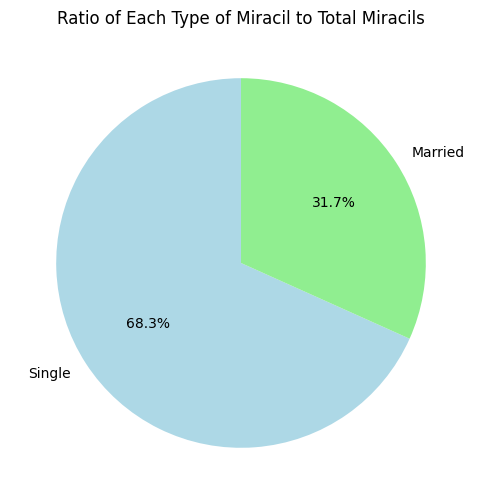

'\n- the data shows that there are more single individuals in the dataset than married ones. This could mean that\nsingle people are more common in the dataset, or there might be reasons why more single people are included compared to married ones.\nso the question is: are the single people more open to have drugs?\n'

In [32]:
miracil_counts = df['Marital_Status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(miracil_counts, labels=df['Marital_Status'].unique(), autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Ratio of Each Type of Miracil to Total Miracils')
plt.show()

'''
- the data shows that there are more single individuals in the dataset than married ones. This could mean that
single people are more common in the dataset, or there might be reasons why more single people are included compared to married ones.
so the question is: are the single people more open to have drugs?
'''

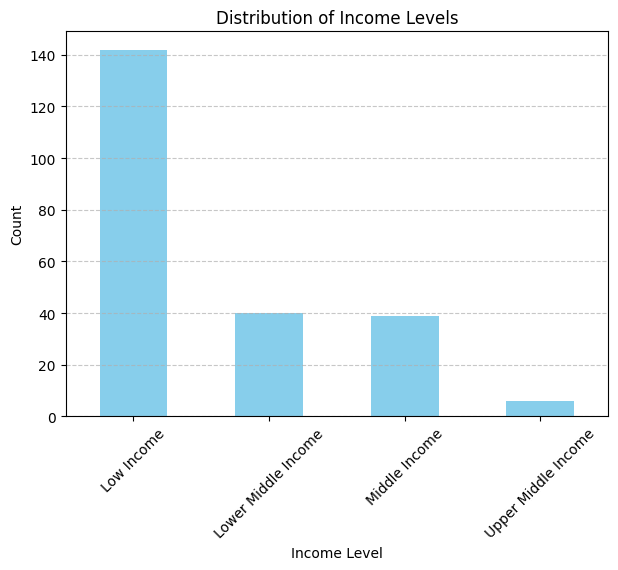

In [33]:
# Count the occurrences of each income level

income_counts = df['Income Level'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(7, 5))
income_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Income Levels')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

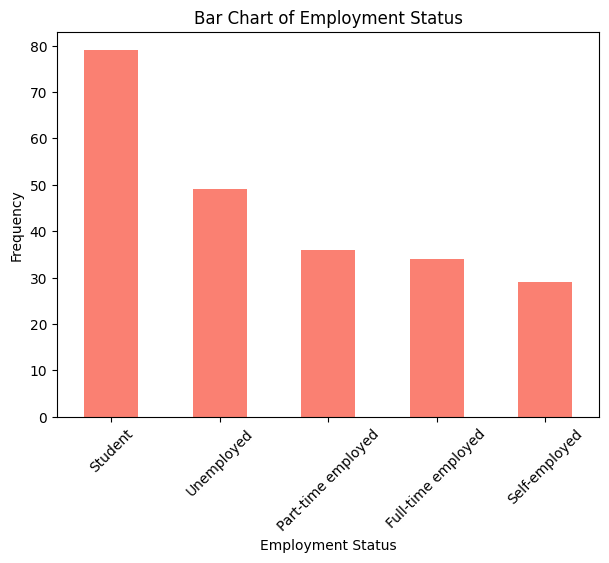

In [34]:
# Plotting the bar chart
plt.figure(figsize=(7, 5))
df['Employment_Status'].value_counts().plot(kind='bar', color='salmon')
plt.title('Bar Chart of Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  
plt.show()

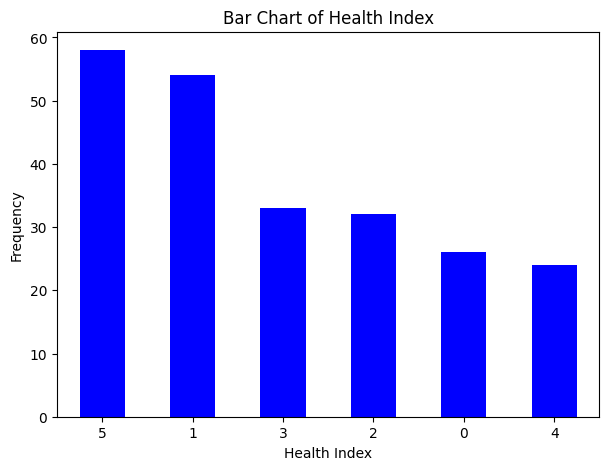

In [35]:
# Plotting the bar chart
plt.figure(figsize=(7, 5))
df['Health Index'].value_counts().plot(kind='bar', color='Blue')
plt.title('Bar Chart of Health Index')
plt.xlabel('Health Index')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

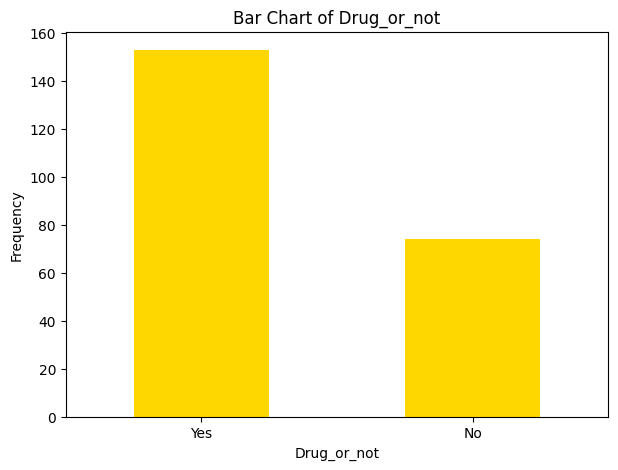

In [36]:
# Plotting the bar chart
plt.figure(figsize=(7, 5))
df['Drug_or_not'].value_counts().plot(kind='bar', color='gold')
plt.title('Bar Chart of Drug_or_not')
plt.xlabel('Drug_or_not')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

In [125]:
grouped = df.groupby(['Employment_Status', 'Health Index']).size().unstack(fill_value=0)
grouped

Health Index,0,1,2,3,4,5
Employment_Status,,,,,,
Full-time employed,5,8,6,4,4,7
Part-time employed,2,11,3,10,2,8
Self-employed,1,9,4,2,3,10
Student,8,18,9,10,12,22
Unemployed,10,8,10,7,3,11


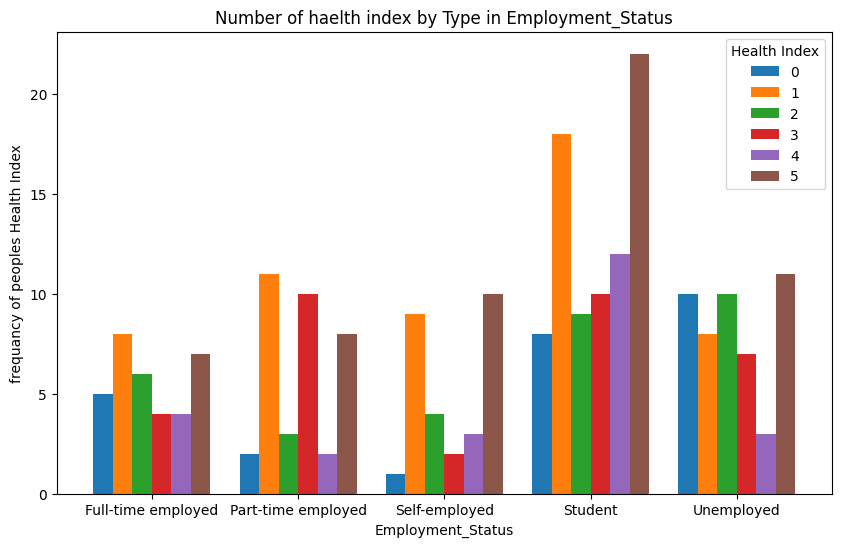

'\n- unemployed get the most frequent unhealthy indexing, then the students; even thought the students are having \n  the most good healthy indexing (students have higher frequencies of health index scores of 1 and 5 compared to\n  other employment categories)\n- among full-time employed individuals, there is variability in the distribution of health index scores, with\n  higher frequencies observed for health index values of 1, 2, and 5.\n'

In [37]:
grouped = df.groupby(['Employment_Status', 'Health Index']).count()
grouped = grouped['Case_ID'].reset_index(name='Count')
pivot_table = grouped.pivot(index='Employment_Status', columns='Health Index', values='Count')
pivot_table.plot(kind='bar', figsize=(10, 6), width=0.8)
plt.title('Number of haelth index by Type in Employment_Status')
plt.xlabel('Employment_Status')
plt.ylabel('frequancy of peoples Health Index')
plt.xticks(rotation=0)
plt.legend(title='Health Index')
plt.show()

'''
- unemployed get the most frequent unhealthy indexing, then the students; even thought the students are having 
  the most good healthy indexing (students have higher frequencies of health index scores of 1 and 5 compared to
  other employment categories)
- among full-time employed individuals, there is variability in the distribution of health index scores, with
  higher frequencies observed for health index values of 1, 2, and 5.
'''

In [38]:
mean_of_age = df['Age'].mean()
mean_of_age

23.740088105726873

In [39]:
median_of_age = df['Age'].median()
median_of_age

21.0

In [40]:
mode_of_Employment_Status = df['Employment_Status'].mode()[0]
mode_of_Employment_Status

'Student'

In [41]:
'''
- mean: The average risk factor score is approximately 1.50. This indicates the average level of risk for drug addiction 
based on the behavior and health indicators.
- std: The standard deviation is approximately 0.79. This measures the dispersion or variability of 
the risk factor scores around the mean. A higher standard deviation indicates greater variability in the risk scores.

'''


df['Risk_Factor_Score'].describe()

count    227.000000
mean       1.503809
std        0.793593
min        0.000000
25%        1.063169
50%        1.896634
75%        2.032541
max        3.373045
Name: Risk_Factor_Score, dtype: float64

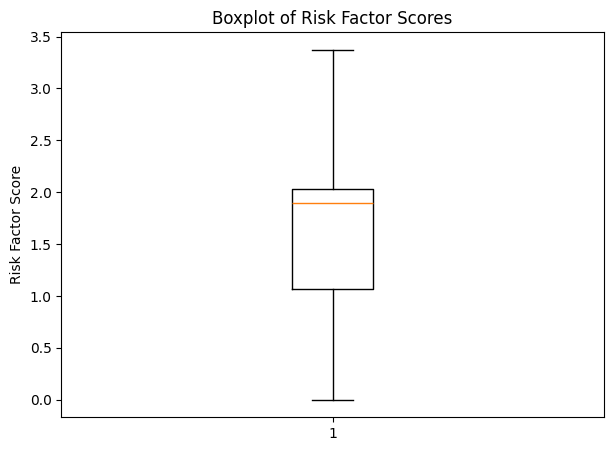

In [121]:
# Draw the boxplot
plt.figure(figsize=(7, 5))
plt.boxplot(df['Risk_Factor_Score'])
plt.title('Boxplot of Risk Factor Scores')
plt.ylabel('Risk Factor Score')
plt.show()

In [43]:
# Find the maximum value of Risk_Factor_Score
max_risk_score = df['Risk_Factor_Score'].max()

# Filter the DataFrame for rows where Risk_Factor_Score is equal to the maximum value
max_risk_df = df[df['Risk_Factor_Score'] == max_risk_score]

# Calculate the frequency of Employment_Status in the filtered DataFrame
employment_status_freq = max_risk_df['Employment_Status'].value_counts()

print("Frequency of Employment_Status for the maximum Risk_Factor_Score:")
print(employment_status_freq)

Frequency of Employment_Status for the maximum Risk_Factor_Score:
Employment_Status
Full-time employed    1
Name: count, dtype: int64


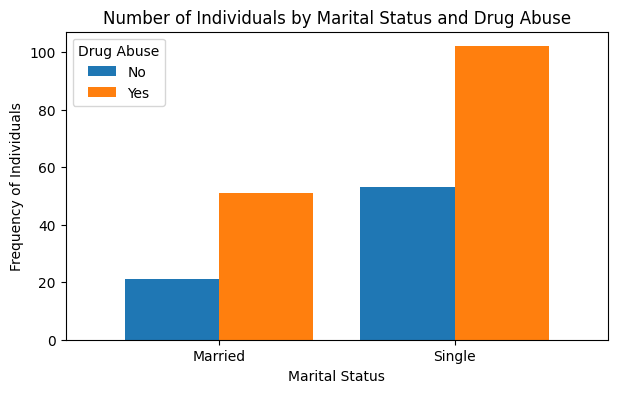

'\nit seems that the double of the single and married people that do not have drugs, take drugs\nbas still why the dataset is more out of singles?\n\n'

In [44]:
# Grouping by 'Marital_Status' and 'Drug_or_not'
grouped = df.groupby(['Marital_Status', 'Drug_or_not']).count()
grouped = grouped['Case_ID'].reset_index(name='Count')

# Creating a pivot table
pivot_table = grouped.pivot(index='Marital_Status', columns='Drug_or_not', values='Count')

# Plotting the grouped bar chart
pivot_table.plot(kind='bar', figsize=(7, 4), width=0.8)

plt.title('Number of Individuals by Marital Status and Drug Abuse')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Individuals')
plt.xticks(rotation=0)
plt.legend(title='Drug Abuse', labels=['No', 'Yes'])
plt.show()

'''
it seems that the double of the single and married people that do not have drugs, take drugs
bas still why the dataset is more out of singles?

'''

In [45]:
grouped_data = df.groupby(['Employment_Status', 'Drug_or_not']).size().unstack(fill_value=0)
print(grouped_data)

Drug_or_not         No  Yes
Employment_Status          
Full-time employed  10   24
Part-time employed  10   26
Self-employed       12   17
Student             30   49
Unemployed          12   37


In [46]:
grouped_data = df.groupby(['Employment_Status', 'Marital_Status', 'absence_from_work', 'Drug_or_not']).size().unstack(fill_value=0)
grouped_data

Drug_or_not                                          No  Yes
Employment_Status  Marital_Status absence_from_work         
Full-time employed Married        No                  6    5
                                  Yes                 0   14
                   Single         No                  4    1
                                  Yes                 0    4
Part-time employed Married        No                  2    0
                                  Yes                 0    9
                   Single         No                  7    4
                                  Yes                 1   13
Self-employed      Married        No                 12    4
                                  Yes                 0    9
                   Single         No                  0    2
                                  Yes                 0    2
Student            Single         No                 28   10
                                  Yes                 2   39
Unemployed         Married        No                  0    3
                                  Yes                 1    7
                   Single         No                 11    9
                                  Yes                 0   18

In [47]:
grouped_data = df.groupby(['Employment_Status', 'Marital_Status', 'Drug_or_not']).size().unstack(fill_value=0)
print(grouped_data)

'''
the highest poeple that takes drugs are the students then the unemplyed single poeple, why?
+ fulltine, married and takes drugs? third category? why?
'''
grouped_data

Drug_or_not                        No  Yes
Employment_Status  Marital_Status         
Full-time employed Married          6   19
                   Single           4    5
Part-time employed Married          2    9
                   Single           8   17
Self-employed      Married         12   13
                   Single           0    4
Student            Single          30   49
Unemployed         Married          1   10
                   Single          11   27


Drug_or_not                        No  Yes
Employment_Status  Marital_Status         
Full-time employed Married          6   19
                   Single           4    5
Part-time employed Married          2    9
                   Single           8   17
Self-employed      Married         12   13
                   Single           0    4
Student            Single          30   49
Unemployed         Married          1   10
                   Single          11   27

In [53]:
stress_stats = df['Weighted_Stress_Index'].describe()
stress_stats

count    227.000000
mean      16.869343
std       11.730187
min        0.000000
25%        3.800000
50%       19.921076
75%       27.123437
max       33.791716
Name: Weighted_Stress_Index, dtype: float64

min_Weighted_Stress_Index: 0.0
max_Weighted_Stress_Index: 33.79171632


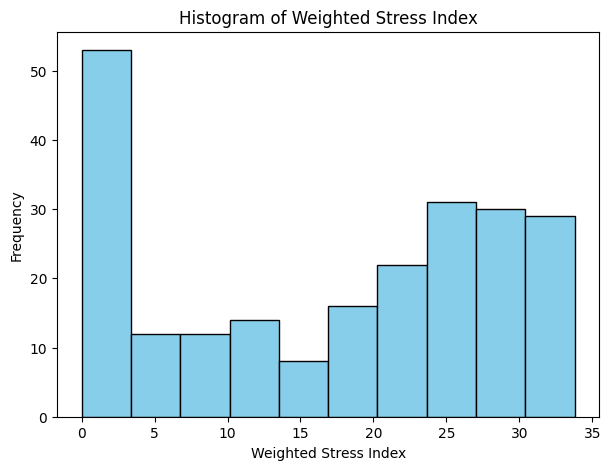

In [54]:
min_Weighted_Stress_Index = df['Weighted_Stress_Index'].min()
max_Weighted_Stress_Index = df['Weighted_Stress_Index'].max()
print('min_Weighted_Stress_Index:', min_Weighted_Stress_Index)
print('max_Weighted_Stress_Index:', max_Weighted_Stress_Index)

# Plotting
plt.figure(figsize=(7, 5))

# Create a histogram of Weighted Stress Index
plt.hist(df['Weighted_Stress_Index'], bins=10, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of Weighted Stress Index')
plt.xlabel('Weighted Stress Index')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [55]:
df['Weighted_Stress_Index'].describe()

count    227.000000
mean      16.869343
std       11.730187
min        0.000000
25%        3.800000
50%       19.921076
75%       27.123437
max       33.791716
Name: Weighted_Stress_Index, dtype: float64

In [56]:
grouped_data = df.groupby(['Employment_Status', 'absence_from_work', 'Drug_or_not']).size().unstack(fill_value=0)
print(grouped_data)
print("****************************************************************************************************")
#relative freq
row_sums = grouped_data.sum(axis=1)
relative_frequency = grouped_data.div(row_sums, axis=0)
print(relative_frequency)

Drug_or_not                           No  Yes
Employment_Status  absence_from_work         
Full-time employed No                 10    6
                   Yes                 0   18
Part-time employed No                  9    4
                   Yes                 1   22
Self-employed      No                 12    6
                   Yes                 0   11
Student            No                 28   10
                   Yes                 2   39
Unemployed         No                 11   12
                   Yes                 1   25
****************************************************************************************************
Drug_or_not                                 No       Yes
Employment_Status  absence_from_work                    
Full-time employed No                 0.625000  0.375000
                   Yes                0.000000  1.000000
Part-time employed No                 0.692308  0.307692
                   Yes                0.043478  0.956522
Self-

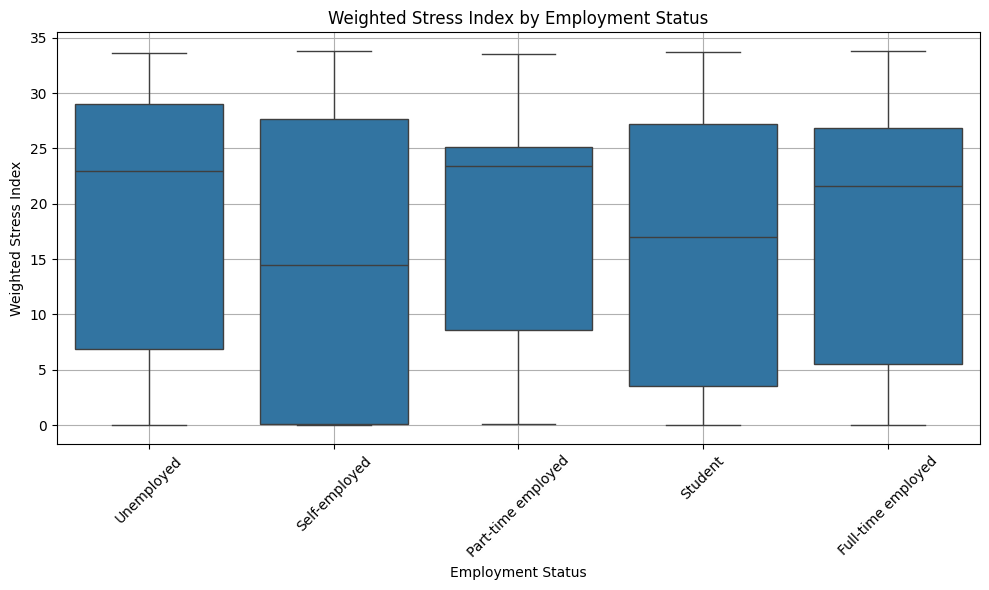

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Status', y='Weighted_Stress_Index', data=df)
plt.title('Weighted Stress Index by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Weighted Stress Index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

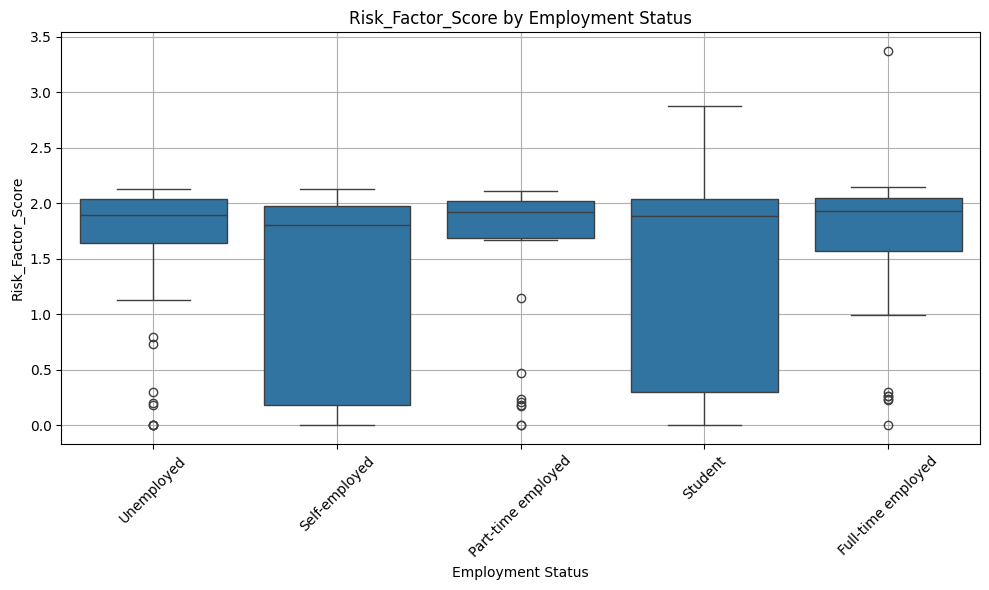

In [122]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment_Status', y='Risk_Factor_Score', data=df)
plt.title('Risk_Factor_Score by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Risk_Factor_Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

    Employment_Status  Weighted_Stress_Index
0  Full-time employed              17.727034
1  Part-time employed              17.602960
2       Self-employed              14.630818
3             Student              15.837807
4          Unemployed              18.723158


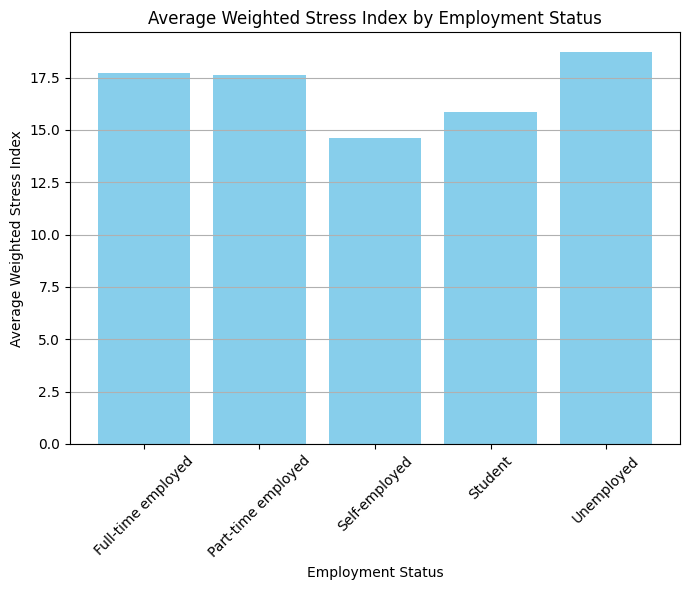

In [58]:
average_stress = df.groupby('Employment_Status')['Weighted_Stress_Index'].mean().reset_index()
print(average_stress)
# Create a bar plot to visualize the average Weighted_Stress_Index for each Employment_Status category
plt.figure(figsize=(7, 6))
plt.bar(average_stress['Employment_Status'], average_stress['Weighted_Stress_Index'], color='skyblue')
plt.title('Average Weighted Stress Index by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Average Weighted Stress Index')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines on y-axis
plt.tight_layout()
plt.show()

Drug_or_not  No  Yes
taken_drugs         
No           67  128
Yes           7   25


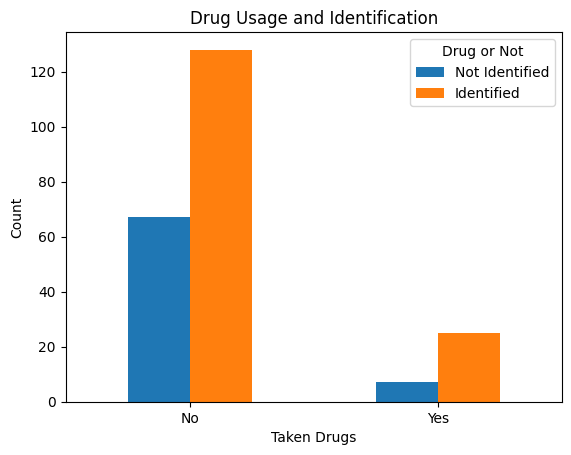

In [63]:
grouped_data = df.groupby(['taken_drugs', 'Drug_or_not']).size().unstack()
print(grouped_data)
grouped_data.plot(kind='bar')

# Add labels and title
plt.title('Drug Usage and Identification')
plt.xlabel('Taken Drugs')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)  # Customizing x-axis labels

# Show the plot
plt.legend(title='Drug or Not', labels=['Not Identified', 'Identified'])
plt.show()

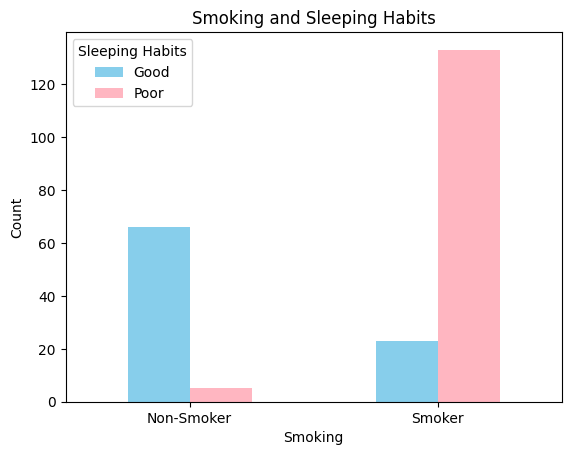

In [82]:
import matplotlib.pyplot as plt

# Group the data
grouped_data = df.groupby(['Smoking', 'sleeping_habits']).size().unstack()

# Plot the bar chart
ax = grouped_data.plot(kind='bar', color=['skyblue', 'lightpink'])

# Add labels and title
plt.title('Smoking and Sleeping Habits')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'], rotation=0)  # Customizing x-axis labels

# Show the plot
plt.legend(title='Sleeping Habits', labels=['Good', 'Poor'])
plt.show()


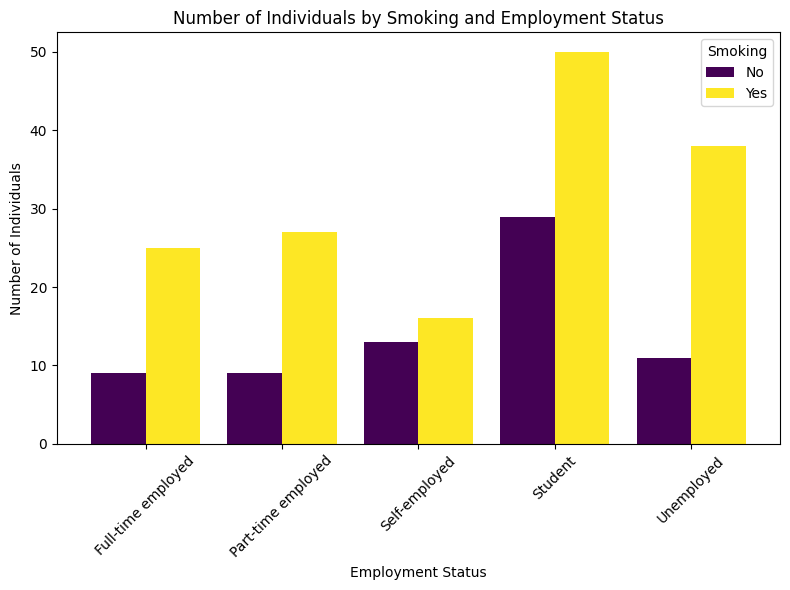

Smoking,No,Yes
Employment_Status,,
Full-time employed,9.0,25.0
Part-time employed,9.0,27.0
Self-employed,13.0,16.0
Student,29.0,50.0
Unemployed,11.0,38.0


In [98]:
import matplotlib.pyplot as plt

# Create a pivot table from grouped
pivot_table = grouped.pivot_table(index='Employment_Status', columns='Smoking', values='Count')

# Plotting the bar chart
pivot_table.plot(kind='bar', figsize=(8, 6), width=0.8,colormap='viridis')

# Adding labels and title
plt.title('Number of Individuals by Smoking and Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Showing the plot
plt.legend(title='Smoking', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

pivot_table

In [108]:
contingency_table = pd.crosstab(df['Employment_Status'], df['absence_from_work'], margins=True)
contingency_table

absence_from_work,No,Yes,All
Employment_Status,,,
Full-time employed,16,18,34
Part-time employed,13,23,36
Self-employed,18,11,29
Student,38,41,79
Unemployed,23,26,49
All,108,119,227


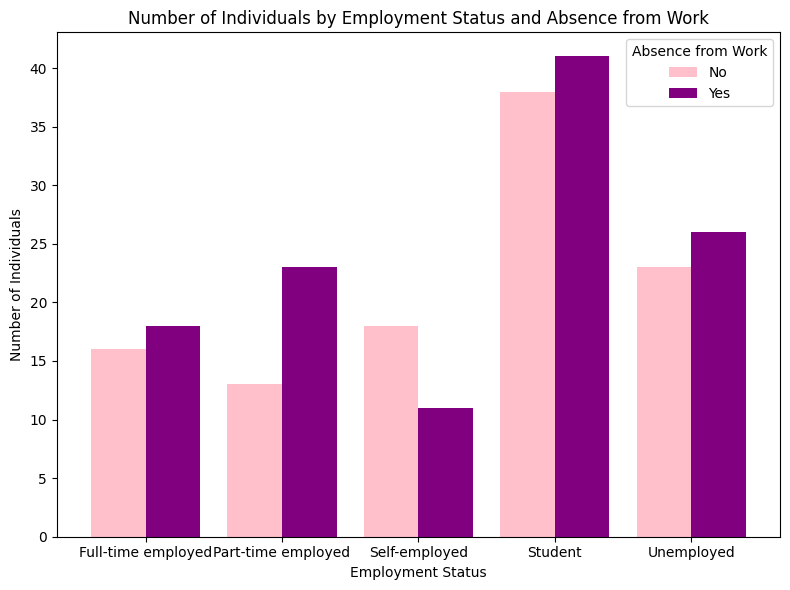

absence_from_work,No,Yes
Employment_Status,,
Full-time employed,16.0,18.0
Part-time employed,13.0,23.0
Self-employed,18.0,11.0
Student,38.0,41.0
Unemployed,23.0,26.0


In [107]:
grouped = df.groupby(['Employment_Status', 'absence_from_work']).count()

# Reset the index and rename the count column to 'Count'
grouped = grouped['Case_ID'].reset_index(name='Count')

# Create a pivot table from grouped
pivot_table = grouped.pivot_table(index='Employment_Status', columns='absence_from_work', values='Count')

# Plotting the bar chart
pivot_table.plot(kind='bar', figsize=(8, 6), width=0.8, color=['pink', 'purple'])

# Adding labels and title
plt.title('Number of Individuals by Employment Status and Absence from Work')
plt.xlabel('Employment Status')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Showing the plot
plt.legend(title='Absence from Work', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

# Display the pivot table
pivot_table

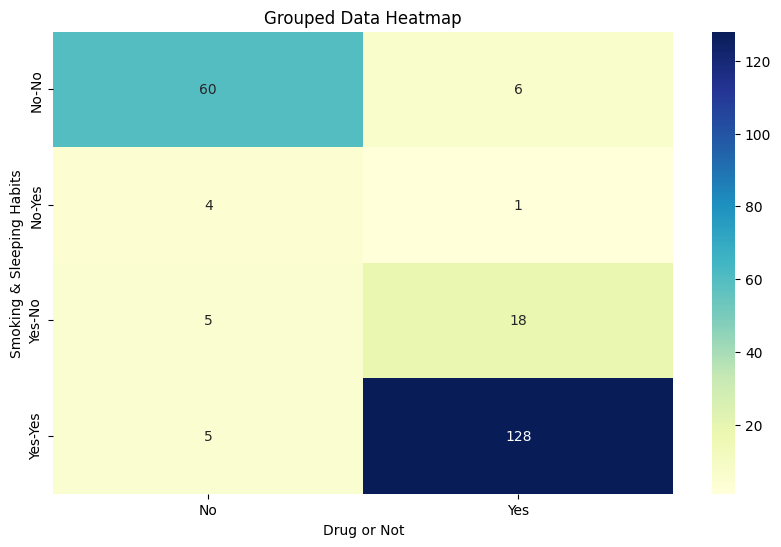

In [84]:
# Generate the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, annot=True, cmap='YlGnBu', fmt='g')

# Add labels and title
plt.title('Grouped Data Heatmap')
plt.xlabel('Drug or Not')
plt.ylabel('Smoking & Sleeping Habits')

# Show the plot
plt.show()

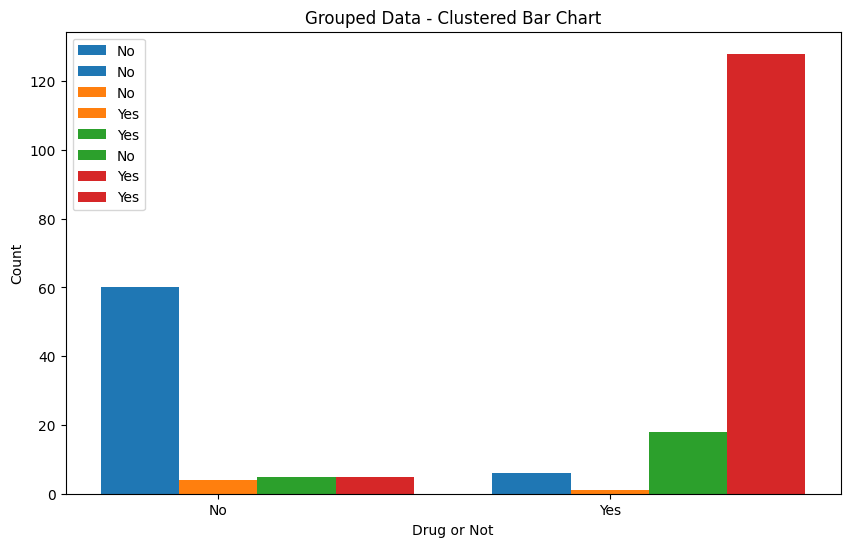

In [86]:
#chatGPT
# Set the figure size
plt.figure(figsize=(10, 6))

# Define the x-axis labels and positions
x_labels = grouped_data.columns
x_positions = range(len(x_labels))

# Define the width of each bar
bar_width = 0.2

# Plot each group
for i, (label, values) in enumerate(grouped_data.iterrows()):
    plt.bar([x + i * bar_width for x in x_positions], values, width=bar_width, label=label)

# Add labels and title
plt.title('Grouped Data - Clustered Bar Chart')
plt.xlabel('Drug or Not')
plt.ylabel('Count')
plt.xticks([x + bar_width for x in x_positions], x_labels)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [112]:
grouped_data = df.groupby(['absence_from_work', 'Smoking', 'Drug_or_not', 'Employment_Status']).size().unstack(fill_value=0)
grouped_data

Employment_Status                      Full-time employed  Part-time employed  \
absence_from_work Smoking Drug_or_not                                           
No                No      No                            8                   7   
                          Yes                           1                   1   
                  Yes     No                            2                   2   
                          Yes                           5                   3   
Yes               No      No                            0                   0   
                          Yes                           0                   1   
                  Yes     No                            0                   1   
                          Yes                          18                  21   

Employment_Status                      Self-employed  Student  Unemployed  
absence_from_work Smoking Drug_or_not                                      
No                No      No                      11       26          10  
                          Yes                      2        0           0  
                  Yes     No                       1        2           1  
                          Yes                      4       10          12  
Yes               No      No                       0        2           0  
                          Yes                      0        1           1  
                  Yes     No                       0        0           1  
                          Yes                     11       38          24

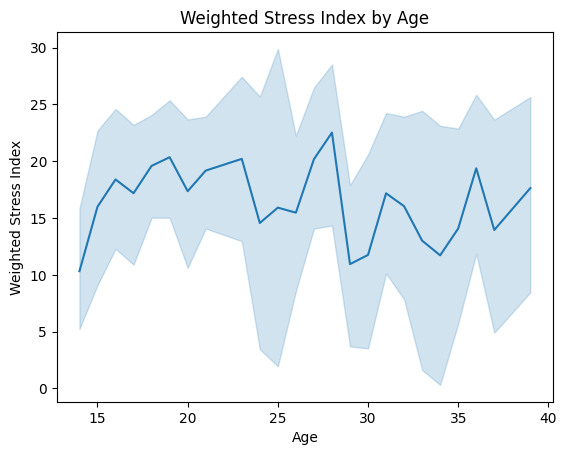

In [115]:
# Create the line chart
sns.lineplot(data=df, x='Age', y='Weighted_Stress_Index')

# Adding titles and labels for clarity
plt.title('Weighted Stress Index by Age')
plt.xlabel('Age')
plt.ylabel('Weighted Stress Index')

# Show the plot
plt.show()

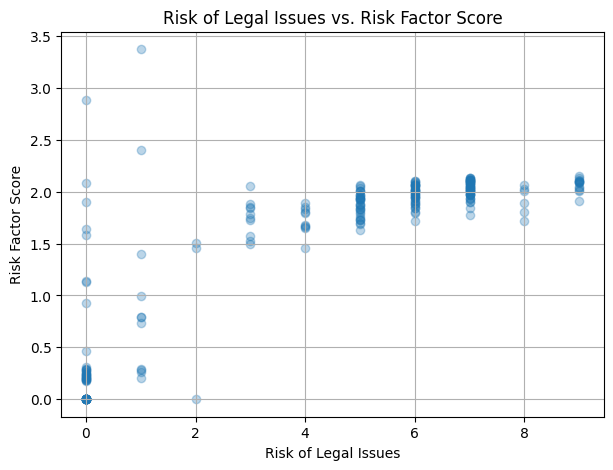

In [119]:
# Create the scatter plot
plt.figure(figsize=(7, 5))
plt.scatter(df['Risk_of_Legal_Issues'], df['Risk_Factor_Score'], alpha=0.3)

# Adding titles and labels for clarity
plt.title('Risk of Legal Issues vs. Risk Factor Score')
plt.xlabel('Risk of Legal Issues')
plt.ylabel('Risk Factor Score')

# Show the plot
plt.grid(True)
plt.show()


In [120]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(df['Risk_of_Legal_Issues'], df['Risk_Factor_Score'])

# Print the correlation coefficient
print("Correlation coefficient between Risk of Legal Issues and Risk Factor Score:", correlation)


Correlation coefficient between Risk of Legal Issues and Risk Factor Score: 0.8227700380035544
